# Find bounderies of parcels #

Find bounderies of all parcels of a communauty

# Impot libraries #

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Define files to read and load data #

In [2]:
# Definition of files

file_NPCS_PARV = "../data/shapefiles/NPCS_CAD_TPR_PARV_S.shp"
file_MOVD_PARV= "../data/shapefiles/MOVD_CAD_TPR_PARV_S.shp"
file_communes_vd = '../data/communes_vd.csv'

In [3]:
# Load data

parcelles_NPCS_PARV = gpd.read_file(file_NPCS_PARV)
parcelles_MOVD_PARV = gpd.read_file(file_MOVD_PARV)

In [4]:
communes_vd_data = pd.read_csv(file_communes_vd)

In [5]:
# Cleanup

communes_vd_data = communes_vd_data.drop(['GEOMETRY'], axis=1)
communes_vd_data = communes_vd_data.dropna()
communes_vd_data = communes_vd_data[['no_com_can', 'no_com_fed', 'nom_min', 'perimetre']]
communes_vd_data['perimetre'] = [int(i) for i in communes_vd_data.perimetre]

In [6]:
# Merge both geodataframes in one and keep minimal fileds

parcelles_shape = pd.concat([parcelles_NPCS_PARV, parcelles_MOVD_PARV])
parcelles_shape.reset_index(drop=True, inplace=True)
parcelles_shape = parcelles_shape[['IDENTDN', 'geometry']]

In [7]:
# Cleanup

parcelles_shape['IDENTDN'] = parcelles_shape['IDENTDN'].str.replace('VD', '', regex=False)
parcelles_shape['IDENTDN'] = parcelles_shape.IDENTDN.str.slice(stop=4)
parcelles_shape['IDENTDN'] = parcelles_shape['IDENTDN'].str.replace('^0', '', regex=True)
parcelles_shape['IDENTDN'] = [int(i) for i in parcelles_shape.IDENTDN]
parcelles_shape = parcelles_shape.rename(columns={"IDENTDN": "no_com"})

# Create bounderies around each communauties #

In [9]:
#com_bounds = gpd.GeoDataFrame(no_communes)
com_bounds = gpd.GeoDataFrame(communes_vd_data)
com_bounds['geometry'] = None
com_bounds = com_bounds.rename(columns={0: "no_com"})

In [10]:
for index, row in com_bounds.iterrows():
    b  = parcelles_shape.loc[parcelles_shape['no_com'] == row['no_com_can']]
    com_bounds.at[index, 'geometry'] = b.unary_union

# Plot map #

<AxesSubplot:>

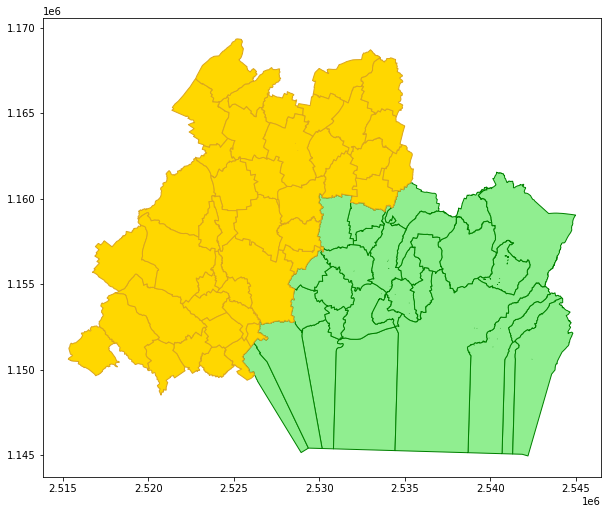

In [11]:
# Plot map

# Layers by perimetre

perim1 = com_bounds.loc[com_bounds['perimetre']==1]
perim2 = com_bounds.loc[com_bounds['perimetre']==2]

fig, ax = plt.subplots(figsize=(10,10))
perim1.plot(ax=ax, facecolor='lightgreen', edgecolor='green')
perim2.plot(ax=ax, facecolor='gold', edgecolor='goldenrod')

# Export to shapefiles #

In [12]:
com_bounds.to_file("../data/limites_communes.shp")

-----

# Tests zone #